In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from windrose import WindroseAxes
import os

## Load Dataset



In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")  

# Summary Statistics & Missing-Value Report

In [3]:
#summary statistics
print("Describtion of the data set")
print(df.describe())

#Missing value report
#Count missing value
print("______________________________________________________________________________")
print("Missing value counts:")
print(df.isna().sum())

print("______________________________________________________________________________")
print("Columns with >5% missing values:")
total_rows = len(df)
for col in df.columns:
    # for each column count missing and calculate missing percent
    missing = df[col].isna().sum()
    percent = (missing / total_rows) * 100
    if percent > 5:
        print(f"{col}: {percent}% missing")


print("______________________________________________________________________________")
print("Dataset Information")
print(df.info())

Describtion of the data set
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%  

# Outlier Detection & Basic Cleaning

In [4]:
#Key columns 
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print("Missing values in key columns:")
#missing values in key columns
print(df[key_columns].isna().sum())

# computing z-score and outlier
z_scores = np.abs(stats.zscore(df[key_columns]))
outlier_flags = (z_scores>3).any(axis = 1)
print(f"Check for Outliers :{outlier_flags.sum()} ")
df['is_outlier'] = outlier_flags

# Impute missing values with median
for col in key_columns:
   df.loc[outlier_flags, col] = df[col].median()


os.makedirs("data", exist_ok=True)
df.to_csv("../data/togo_clean.csv", index=False)


Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Check for Outliers :9251 


# Time Series Analysis

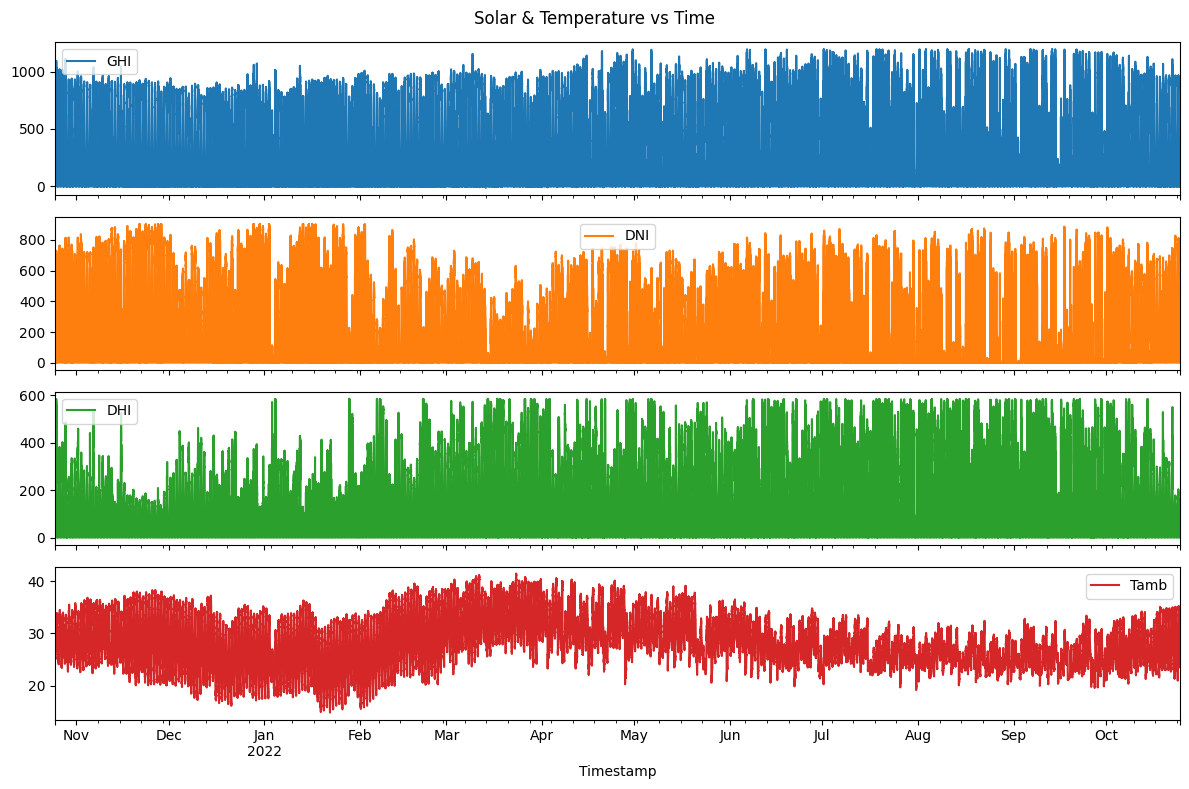

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8), title='Solar & Temperature vs Time')
plt.tight_layout()
plt.show()

# Cleaning impact

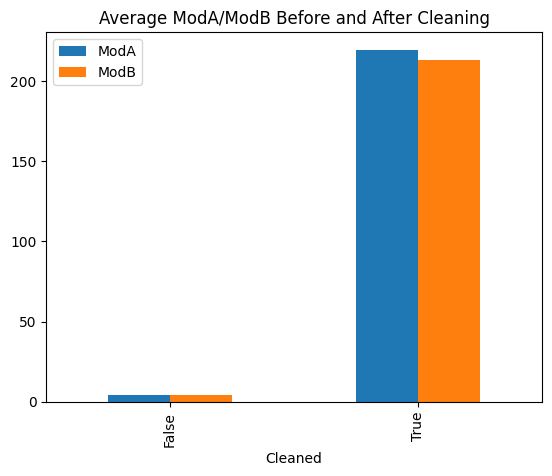

In [6]:
# Grouping cleaned row 
df['Cleaned'] = ~df['is_outlier'] 

df.groupby('Cleaned')[['ModA', 'ModB']].mean().plot(kind='bar', title='Average ModA/ModB Before and After Cleaning')
plt.show()


Correlation & Relationship Analysis

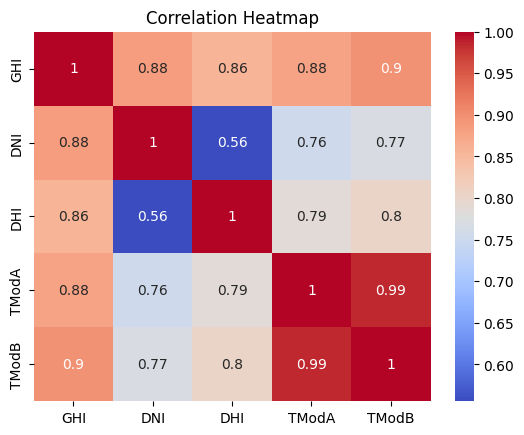

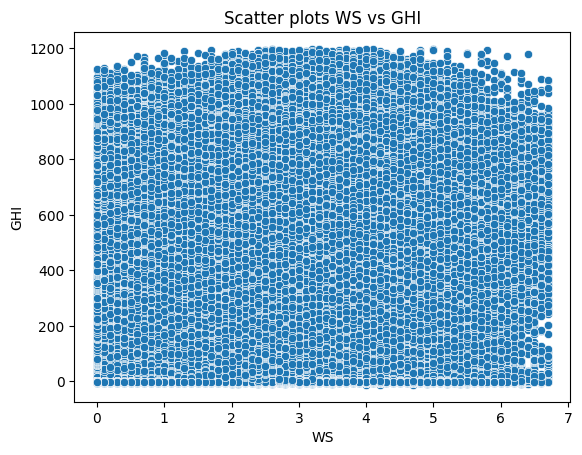

In [ ]:
# Correlation Heatmap
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("Scatter plots WS vs GHI")
plt.show()
sns.scatterplot(data=df, x='WSgust', y='GHI')
plt.title("Scatter plots WSgust vs GHI")
plt.show()
sns.scatterplot(data=df, x='WD', y='GHI')
plt.title("Scatter plots WD vs GHI")
plt.show()
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("Scatter plots RH vs Tamb")
plt.show()
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("Scatter plots RH vs GHI")
plt.show()  


# Wind & Distribution Analysis

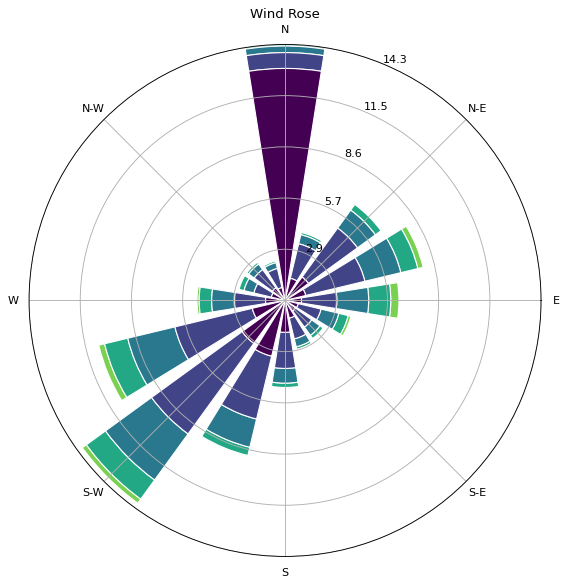

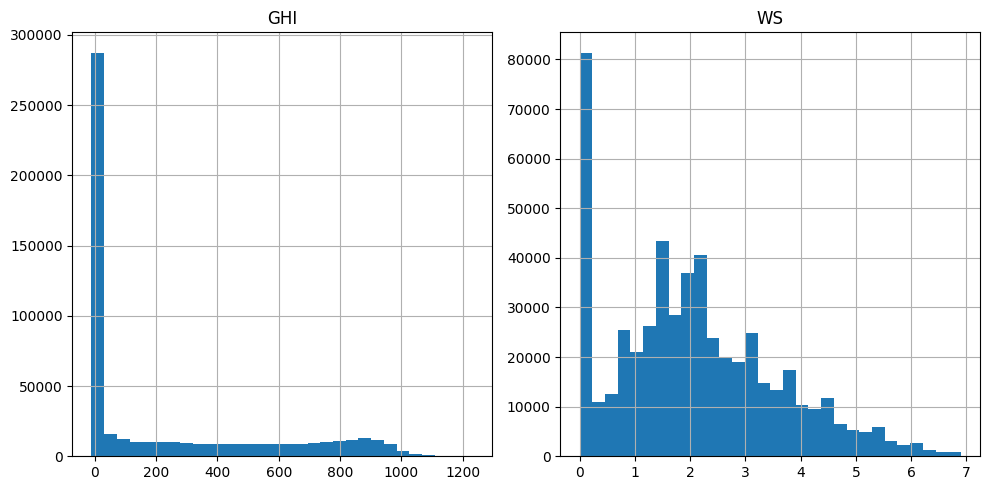

In [ ]:
# Wind rose plot of WS/WD
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose')
plt.show()

# Histogram
df[['GHI', 'WS']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()

# Temperature Analysis

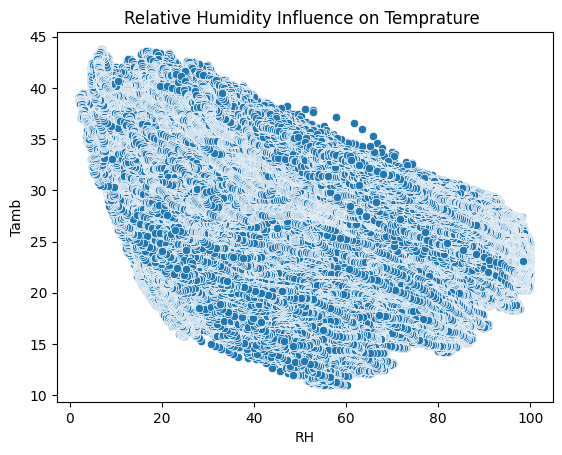

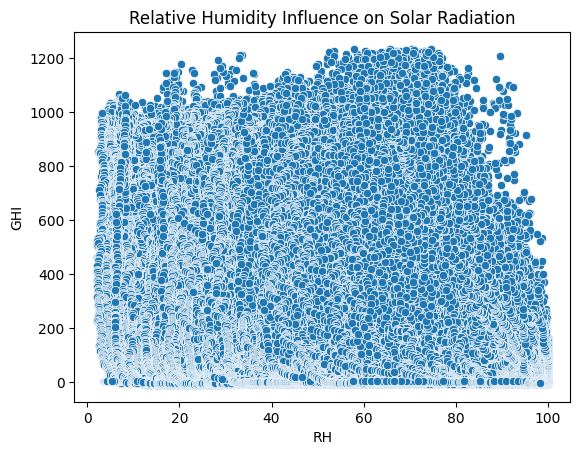

In [ ]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Relative Humidity Influence on Temprature ")
plt.show()
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title("Relative Humidity Influence on Solar Radiation")
plt.show()


# Bubble chart

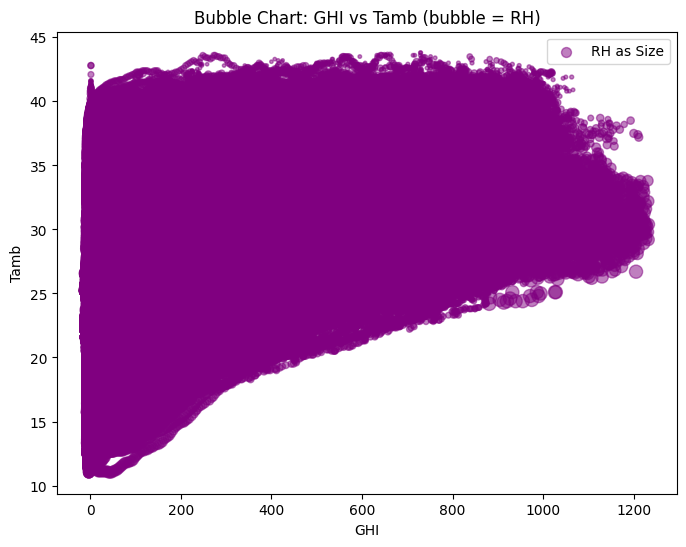

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='purple', label='RH as Size')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb ')
plt.legend()
plt.show()
